In [1]:
import os
os.chdir('../')
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.feature_selection import *
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
train = pd.read_csv('data/UNSW_NB15_training-set.csv',index_col='id')
train.head()

dur proto service state  spkts  dpkts  sbytes  dbytes       rate  \
id                                                                          
1   0.121478   tcp       -   FIN      6      4     258     172  74.087490   
2   0.649902   tcp       -   FIN     14     38     734   42014  78.473372   
3   1.623129   tcp       -   FIN      8     16     364   13186  14.170161   
4   1.681642   tcp     ftp   FIN     12     12     628     770  13.677108   
5   0.449454   tcp       -   FIN     10      6     534     268  33.373826   

    sttl  dttl         sload          dload  sloss  dloss      sinpkt  \
id                                                                      
1    252   254  14158.942380    8495.365234      0      0   24.295600   
2     62   252   8395.112305  503571.312500      2     17   49.915000   
3     62   252   1572.271851   60929.230470      1      6  231.875571   
4     62   252   2740.178955    3358.622070      1      3  152.876547   
5    254   252   8561.499023    3987.059814      2      1   47.750333   

        dinpkt          sjit          djit  swin       stcpb       dtcpb  \
id                                                                         
1     8.375000     30.177547     11.830604   255   621772692  2202533631   
2    15.432865     61.426934   1387.778330   255  1417884146  3077387971   
3   102.737203  17179.586860  11420.926230   255  2116150707  2963114973   
4    90.235726    259.080172   4991.784669   255  1107119177  1047442890   
5    75.659602   2415.837634    115.807000   255  2436137549  1977154190   

    dwin    tcprtt    synack    ackdat  smean  dmean  trans_depth  \
id                                                                  
1    255  0.000000  0.000000  0.000000     43     43            0   
2    255  0.000000  0.000000  0.000000     52   1106            0   
3    255  0.111897  0.061458  0.050439     46    824            0   
4    255  0.000000  0.000000  0.000000     52     64            0   
5    255  0.128381  0.071147  0.057234     53     45            0   

    response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  ct_src_dport_ltm  \
id                                                                              
1                   0           1             0           1                 1   
2                   0          43             1           1                 1   
3                   0           7             1           2                 1   
4                   0           1             1           2                 1   
5                   0          43             1           2                 2   

    ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  ct_ftp_cmd  \
id                                                               
1                  1               1             0           0   
2                  1               2             0           0   
3                  1               3             0           0   
4                  1               3             1           1   
5                  1              40             0           0   

    ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports attack_cat  \
id                                                                         
1                  0           1           1                0     Normal   
2                  0           1           6                0     Normal   
3                  0           2           6                0     Normal   
4                  0           2           1                0     Normal   
5                  0           2          39                0     Normal   

    label  
id         
1       0  
2       0  
3       0  
4       0  
5       0

In [4]:
test = pd.read_csv('data/UNSW_NB15_testing-set.csv',index_col='id')
test.head()

dur proto service state  spkts  dpkts  sbytes  dbytes         rate  \
id                                                                            
1   0.000011   udp       -   INT      2      0     496       0   90909.0902   
2   0.000008   udp       -   INT      2      0    1762       0  125000.0003   
3   0.000005   udp       -   INT      2      0    1068       0  200000.0051   
4   0.000006   udp       -   INT      2      0     900       0  166666.6608   
5   0.000010   udp       -   INT      2      0    2126       0  100000.0025   

    sttl  dttl        sload  dload  sloss  dloss  sinpkt  dinpkt  sjit  djit  \
id                                                                             
1    254     0  180363632.0    0.0      0      0   0.011     0.0   0.0   0.0   
2    254     0  881000000.0    0.0      0      0   0.008     0.0   0.0   0.0   
3    254     0  854400000.0    0.0      0      0   0.005     0.0   0.0   0.0   
4    254     0  600000000.0    0.0      0      0   0.006     0.0   0.0   0.0   
5    254     0  850400000.0    0.0      0      0   0.010     0.0   0.0   0.0   

    swin  stcpb  dtcpb  dwin  tcprtt  synack  ackdat  smean  dmean  \
id                                                                   
1      0      0      0     0     0.0     0.0     0.0    248      0   
2      0      0      0     0     0.0     0.0     0.0    881      0   
3      0      0      0     0     0.0     0.0     0.0    534      0   
4      0      0      0     0     0.0     0.0     0.0    450      0   
5      0      0      0     0     0.0     0.0     0.0   1063      0   

    trans_depth  response_body_len  ct_srv_src  ct_state_ttl  ct_dst_ltm  \
id                                                                         
1             0                  0           2             2           1   
2             0                  0           2             2           1   
3             0                  0           3             2           1   
4             0                  0           3             2           2   
5             0                  0           3             2           2   

    ct_src_dport_ltm  ct_dst_sport_ltm  ct_dst_src_ltm  is_ftp_login  \
id                                                                     
1                  1                 1               2             0   
2                  1                 1               2             0   
3                  1                 1               3             0   
4                  2                 1               3             0   
5                  2                 1               3             0   

    ct_ftp_cmd  ct_flw_http_mthd  ct_src_ltm  ct_srv_dst  is_sm_ips_ports  \
id                                                                          
1            0                 0           1           2                0   
2            0                 0           1           2                0   
3            0                 0           1           3                0   
4            0                 0           2           3                0   
5            0                 0           2           3                0   

   attack_cat  label  
id                    
1      Normal      0  
2      Normal      0  
3      Normal      0  
4      Normal      0  
5      Normal      0

In [5]:
data = pd.concat([train,test])

In [6]:
def plotfig(df,s):
    sns.distplot(df[df["label"]==0][s], hist=False,label="No Attack")
    sns.distplot(df[df["label"]==1][s], hist=False,label="Attack")
    plt.legend()
    plt.show()

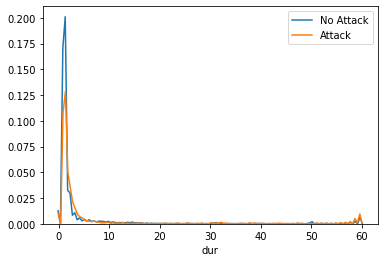

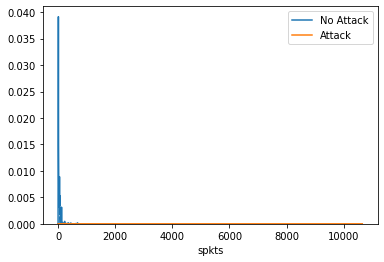

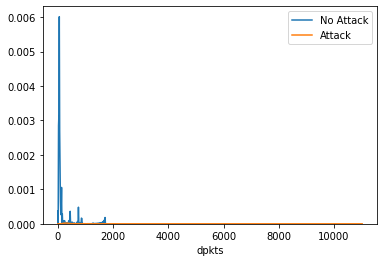

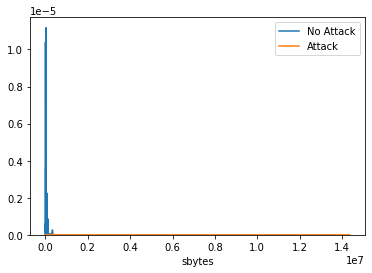

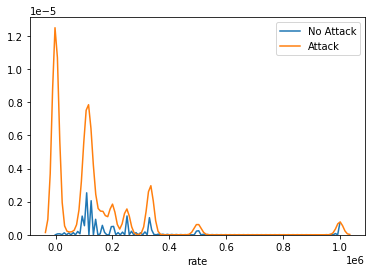

/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


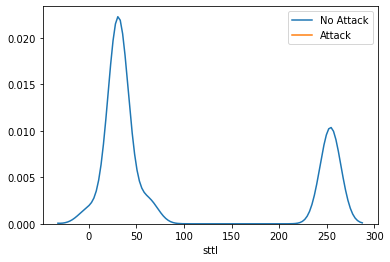

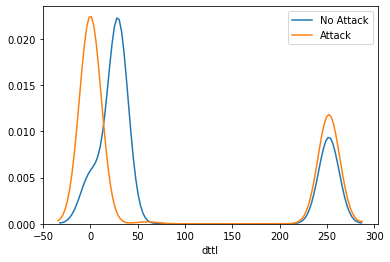

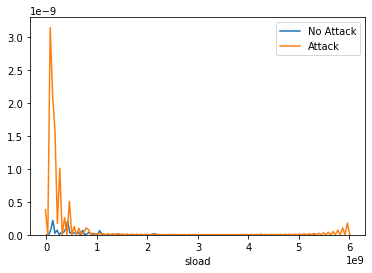

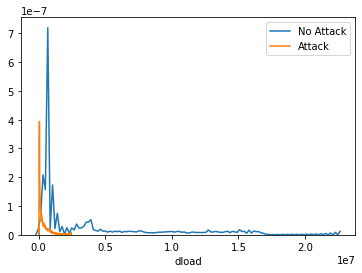

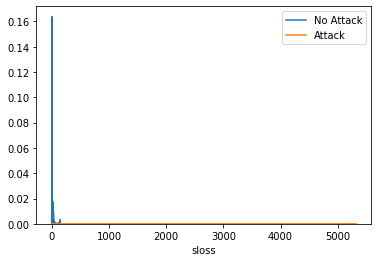

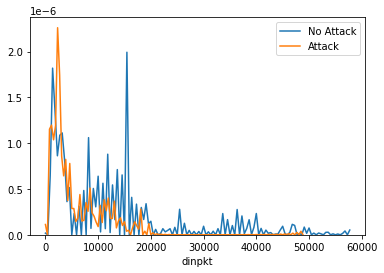

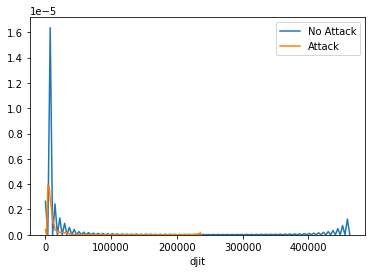

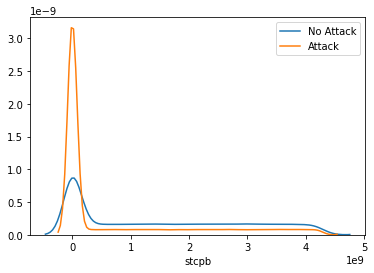

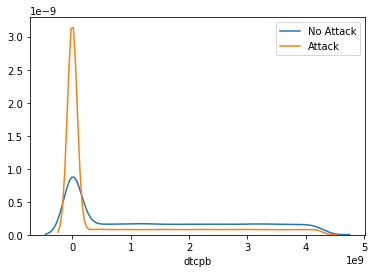

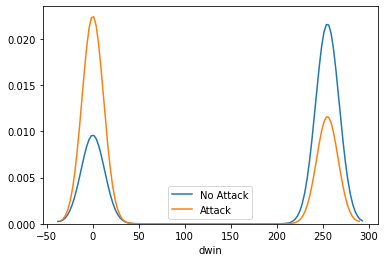

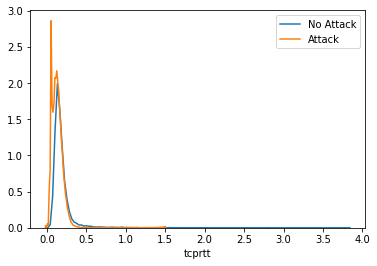

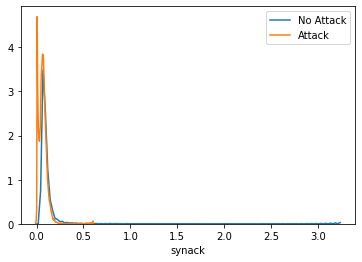

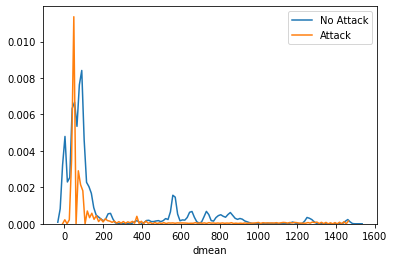

/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


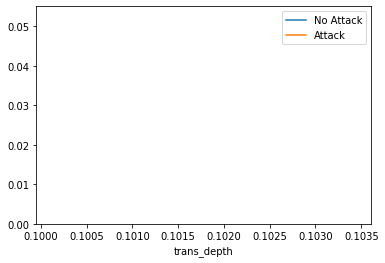

/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


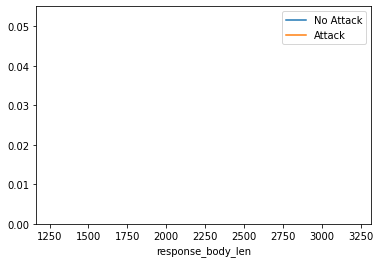

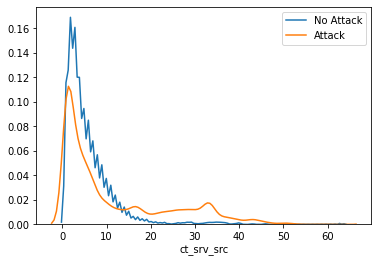

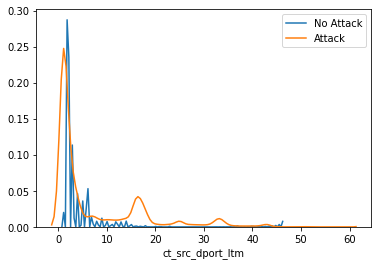

/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


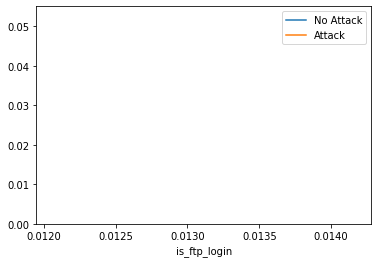

/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/home/jak/.local/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


In [7]:
df_skewness = data.drop(['attack_cat','proto','service','state'], axis=1)
col=df_skewness.columns
norm = []
for i in range(len(col)-2):
    try:
        plotfig(df_skewness,col[i])
    except:
        norm.append(col[i])

In [8]:
norm

[]

In [9]:
def preprocess_initial(df):
    
    # Categorical variables
    dummies1 = pd.get_dummies(data['proto'],drop_first= True)
    dummies2 = pd.get_dummies(data['service'],drop_first= True)
    dummies3 = pd.get_dummies(data['state'],drop_first= True)
    
    
    right = set(df.columns)-set(['label','attack_cat',
                                 'proto','service','state',
                                'swin','dwin','sinpkt'])-set(norm)
    
    left = ['sinpkt']
    
    # Correcting Skewness
    for i in left:
        df[i] = df[i]**3
        
    for i in right:
        df[i] = (df[i]+1).transform(np.log)
    
    # Joining and droping from dataframe
    df       = pd.concat([dummies1, dummies2, dummies3, df], axis=1)
    df       = df.drop(['attack_cat','proto','service','state'], axis=1)
    return df

In [10]:
def preprocess_final(X_train, X_test, y_train, y_test):
    
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    return X_train, X_test, y_train, y_test

In [11]:
def f_score(X_train, X_test, y_train, y_test):
    
    model = XGBClassifier(silent=True,
                      booster = 'gbtree',
                     objective='binary:logistic',
                      n_estimators=5000, 
                        learning_rate = 0.1,
                      max_depth=5,
                        verbosity=0
                     )
    eval_set = [(X_test, y_test)]
    eval_metric = ["logloss"]
    model.fit(X_train, y_train,early_stopping_rounds=100, eval_metric=eval_metric, eval_set=eval_set)
    
    yxgb=model.predict(X_test)
    f_weighted = f1_score(y_true=y_test,y_pred=yxgb,average="weighted")
    f_macro = f1_score(y_true=y_test,y_pred=yxgb,average="macro")
    acc = accuracy_score(y_true=y_test,y_pred=yxgb)
    return (f_weighted,f_macro,acc)

In [12]:
def category(X,y,train_size):
    
    X_train, X_test = X[:][:train_size],X[:][train_size:]
    y_train, y_test = y[:][:train_size],y[:][train_size:]
        
    X_train, X_test, y_train, y_test = preprocess_final(X_train, X_test, y_train, y_test)

    score_w,score_m,score_a  = f_score(X_train, X_test, y_train, y_test)

    return score_w,score_m,score_a

In [13]:
df_final = preprocess_initial(data)
train_y  = df_final['label']
train_x  = df_final.drop(['label'],axis=1)

result1, result2, result3 = category(train_x.values,train_y.values,len(train))
print(f"Weighted F1 Score: {result1}, Macro F1 Score: {result2}, Average Accuracy: {result3}")

[0]	validation_0-logloss:0.63042
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.57871
[2]	validation_0-logloss:0.53707
[3]	validation_0-logloss:0.49983
[4]	validation_0-logloss:0.46954
[5]	validation_0-logloss:0.44323
[6]	validation_0-logloss:0.42121
[7]	validation_0-logloss:0.40090
[8]	validation_0-logloss:0.38391
[9]	validation_0-logloss:0.36898
[10]	validation_0-logloss:0.35620
[11]	validation_0-logloss:0.34531
[12]	validation_0-logloss:0.33530
[13]	validation_0-logloss:0.32647
[14]	validation_0-logloss:0.31890
[15]	validation_0-logloss:0.31270
[16]	validation_0-logloss:0.30616
[17]	validation_0-logloss:0.30187
[18]	validation_0-logloss:0.29668
[19]	validation_0-logloss:0.29211
[20]	validation_0-logloss:0.28890
[21]	validation_0-logloss:0.28514
[22]	validation_0-logloss:0.28238
[23]	validation_0-logloss:0.27950
[24]	validation_0-logloss:0.27687
[25]	validation_0-logloss:0.27443
[26]	validation_0-logloss:0.27191
[27]	validation_0-loglo

In [14]:
df_final = preprocess_initial(data)
train_y  = df_final['label']
train_x  = df_final.drop(['label'],axis=1)
bin1 = sorted([(i,j,k) for j,i,k in zip(f_classif(train_x, train_y)[0],f_classif(train_x, train_y)[1],train_x.columns)],key = lambda x: (x[0],-x[1]))
bin1

[(0.0, 204109.20103857663, 'ct_state_ttl'),
 (0.0, 105853.89648772383, 'dload'),
 (0.0, 93865.33305488636, 'INT'),
 (0.0, 90401.69639067176, 'dmean'),
 (0.0, 88058.72288364236, 'sttl'),
 (0.0, 86100.48667013789, 'dbytes'),
 (0.0, 74313.62293191592, 'dpkts'),
 (0.0, 64391.07320867762, 'ct_dst_sport_ltm'),
 (0.0, 49600.17195282646, 'dttl'),
 (0.0, 45693.20326361558, 'dloss'),
 (0.0, 42478.56326852625, 'sloss'),
 (0.0, 39599.77489640356, 'tcp'),
 (0.0, 39573.799812008925, 'swin'),
 (0.0, 38505.62699116047, 'ct_src_dport_ltm'),
 (0.0, 36539.88466214203, 'spkts'),
 (0.0, 34857.64411864627, 'CON'),
 (0.0, 33571.48517438607, 'stcpb'),
 (0.0, 33496.95214614694, 'dtcpb'),
 (0.0, 33493.64633339066, 'dwin'),
 (0.0, 28043.275005478845, 'sbytes'),
 (0.0, 27259.153604242238, 'FIN'),
 (0.0, 22673.638502730628, 'sload'),
 (0.0, 19705.885404188783, 'sjit'),
 (0.0, 18667.776128567726, 'dns'),
 (0.0, 17308.50443786113, 'rate'),
 (0.0, 16608.266282386925, 'ct_dst_src_ltm'),
 (0.0, 15467.897489249935, 'dji

In [15]:
imp = [i[2] for i in bin1][:30]
result1, result2, result3 = category(train_x[imp].values,train_y.values,len(train))
print(f"Weighted F1 Score: {result1}, Macro F1 Score: {result2}, Average Accuracy: {result3}")

[0]	validation_0-logloss:0.62902
Will train until validation_0-logloss hasn't improved in 100 rounds.
[1]	validation_0-logloss:0.57674
[2]	validation_0-logloss:0.53391
[3]	validation_0-logloss:0.49788
[4]	validation_0-logloss:0.46713
[5]	validation_0-logloss:0.44184
[6]	validation_0-logloss:0.41922
[7]	validation_0-logloss:0.40114
[8]	validation_0-logloss:0.38493
[9]	validation_0-logloss:0.36959
[10]	validation_0-logloss:0.35631
[11]	validation_0-logloss:0.34614
[12]	validation_0-logloss:0.33657
[13]	validation_0-logloss:0.32853
[14]	validation_0-logloss:0.32116
[15]	validation_0-logloss:0.31502
[16]	validation_0-logloss:0.30920
[17]	validation_0-logloss:0.30394
[18]	validation_0-logloss:0.29974
[19]	validation_0-logloss:0.29587
[20]	validation_0-logloss:0.29279
[21]	validation_0-logloss:0.28958
[22]	validation_0-logloss:0.28669
[23]	validation_0-logloss:0.28461
[24]	validation_0-logloss:0.28252
[25]	validation_0-logloss:0.28011
[26]	validation_0-logloss:0.27853
[27]	validation_0-loglo